# Drzewa Wzmacniane Gradientowo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helpers import Node


## Zadanie 1
W tym zadaniu będziesz implementował algorytm Gradient Boosting Trees dla problemu regresji. Aby zaimplementować ten algorytm dostępny jest obiekt `Node` implementujący drzewo regresyjne. Jest to odpowiednio dostosowany obiekt, który implementowałeś w pierwszym zadaniu domowym. Możesz wykorzystać swoją własną implementację (i dostosować ją wg. opisu poniżej) lub skorzystać z implementacji w pliku `helpers`.

W stosunku do poprzedniej implementacji obiekt ma pewne dodatkowe cechy, które umożliwią sprawniejszą implementację:
- W konstruktorze `Node` jest teraz jeden obowiązkowy argument `calculate_leaf_value`, do którego należy wstawić funkcję, która jest wywoływana przez algorytm w momencie tworzenia liścia celem obliczenia jego wartości. W standardowym drzewie regresji algorytm tworzący liść oblicza jego wartość jako średnią wartość jego elementów. Jeśli chcielibyśmy uzyskać takie działanie, powinniśmy zaimplementować następującą funkcję:

```python
def mean_val_leaf(X, y, last_predicted):
    return np.mean(y)

tree = Node(calculate_leaf_value=mean_val_leaf)
```
Zwróć uwagę na parametry funkcji tworzącej liść: `X`, `y` charakteryzujące obiekty w liściu oraz `last_predicted` przechowujące aktualną predykcję klasyfikatora dla tych obiektów. Poprzez aktualną predykcję rozumiemy tu predykcję uzyskaną wszystkimi dotychczas stworzonymi klasyfikatorami bazowymi w GBT (czyli wynik osiągnięty pozostałymi drzewami niż to tworzone). Argument `last_predicted` na chwilę obecną wydaje się niepotrzebny, lecz będzie on potrzebny do realizacji zadania.

- Dodatkowe argumenty obsługuje też funkcja ucząca model `fit(X, y, last_predicted, max_depth = None)` - która dostaje na wejście wcześniej wspomniane `last_predicted` oraz argument `max_depth` wstrzymujący budowę zbyt głębokich drzew. Innych mechanizmów pruningu niezaimplementowano, jeśli jednak takowe istnieją w Twojej implementacji, możesz je wykorzystać.

Stwórz zbiór danych do regresji poniższym kodem:

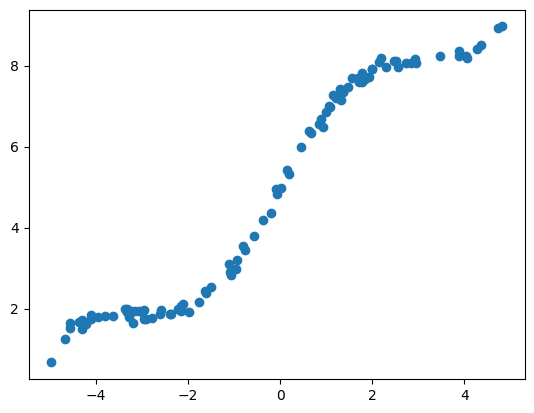

In [19]:
X = np.random.uniform(-5, 5, 100)
y = 5 + X + np.sin(X) + np.random.normal(scale=0.1, size=100)
plt.plot(X, y, 'o')
X = np.expand_dims(X, axis=1)

Zaimplementuj algorytm GBT dla błędu kwadratowego. Aby to zrobić należy uzupełnić w ogólnym pseudokodzie przedstawionym na zajęciach trzy elementy:
- model początkowy $F_0(x)$ zwracający stałą wartość $v$ która optymalizuje błąd:
$$F_0(x) = \arg \min_v \sum_{i=1}^N L(y_i, v) $$
- wzór na wartość ujemnego gradientu tj. pseudo-rezyduum:
$$r_i  =  - \frac{\partial}{\partial \hat{y_i}} L(y_i, \hat{y_i}) $$
gdzie $\hat{y_i}$ to aktualna predykcja klasyfikatora tj. w $m$-tej iteracji $\hat{y_i}=F_m(x)$
- wzór na wartość liścia $v$ optymalizujący funkcję celu całego modelu GBT
$$v = \arg \min_v \sum_{i=1}^{N_l} L(y_i, F_{m-1}(x_i) + v) $$
Zwróć uwagę, że suma iteruje tylko po instancjach w liściu (${N_l}$ to liczba elementów w liściu).

Wyznacz powyższe wartości (rozwiązania dla referencji poniżej komórki z kodem) i zaimplementuj algorytm. 

In [3]:
from numpy.typing import NDArray


class GBTRegressor(object):

  def __init__(self):
    self.trees = []
    self.initial_model = None
    self.residuals: list[NDArray] = []

  def calc_leaf(self, X, y, last_predicted):
    return np.mean(y)

  def fit(self, X, y, M=100, max_depth=1):
    self.initial_model = np.mean(y)
    last_predicted = np.full(X.shape[0], self.initial_model)

    for m in range(M):
      residual = y - last_predicted
      tree = Node(calculate_leaf_value=self.calc_leaf)
      tree.fit(X, residual, last_predicted, max_depth=max_depth)
      last_predicted += tree.predict(X)
      self.trees.append(tree)
      self.residuals.append(residual)

  def predict(self, X):
    return self.initial_model + np.sum([tree.predict(X) for tree in self.trees], axis=0)


Przetestuj działanie algorytmu:

/home/teba_dzdancewicz/PycharmProjects/2023-sus/venv/lib64/python3.11/site-packages/numpy/core/fromnumeric.py:3747: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/teba_dzdancewicz/PycharmProjects/2023-sus/venv/lib64/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/teba_dzdancewicz/PycharmProjects/2023-sus/venv/lib64/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


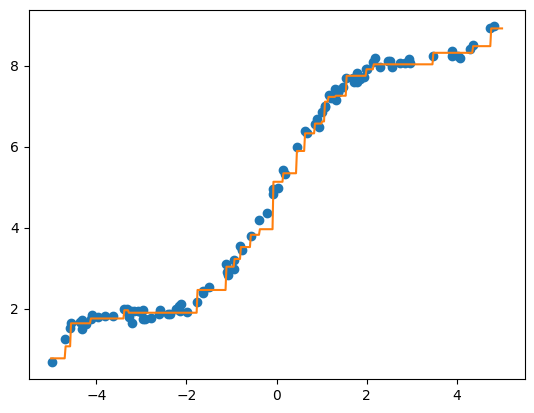

In [20]:
X_test = np.linspace(-5, 5, num=500)
X_test = np.expand_dims(X_test, axis=1)
gbt = GBTRegressor()
gbt.fit(X, y)
y_pred = gbt.predict(X_test)
plt.plot(X, y, 'o')
plt.plot(X_test, y_pred, '-')

Narysuj wynik modelu z odpowednio 1, 2, 5, 10 i 100 klasyfikatorami bazowami. Za klasfikator bazowy przyjmij decision stump.

/home/teba_dzdancewicz/PycharmProjects/2023-sus/venv/lib64/python3.11/site-packages/numpy/core/fromnumeric.py:3747: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/teba_dzdancewicz/PycharmProjects/2023-sus/venv/lib64/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/teba_dzdancewicz/PycharmProjects/2023-sus/venv/lib64/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


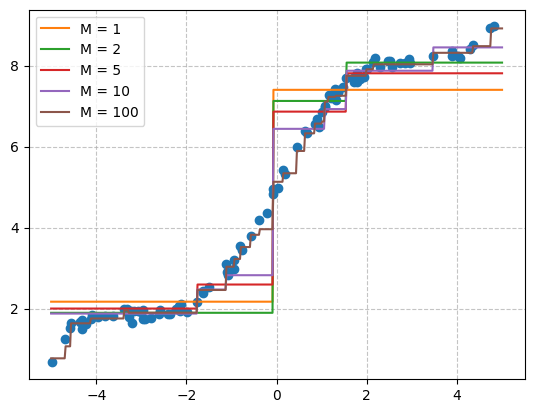

In [21]:
plt.plot(X, y, 'o')
for m in [1, 2, 5, 10, 100]:
    gbt = GBTRegressor()
    gbt.fit(X, y, M=m)
    y_pred = gbt.predict(X_test)
    plt.plot(X_test, y_pred, '-', label=f'M = {m}')

plt.grid(linestyle='--', linewidth=0.8, alpha=0.75)
plt.legend()

Sprawdź jak zmieniają się wartości redyduów w kilku początkowych iteracjach GBT. Narysuj wykresy $x$ vs $y-\hat{y}$ - zwróć uwagę, że tak właśnie wyglądają zbiory na których uczą się kolejne klasyfikatory.

/home/teba_dzdancewicz/PycharmProjects/2023-sus/venv/lib64/python3.11/site-packages/numpy/core/fromnumeric.py:3747: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/teba_dzdancewicz/PycharmProjects/2023-sus/venv/lib64/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/teba_dzdancewicz/PycharmProjects/2023-sus/venv/lib64/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


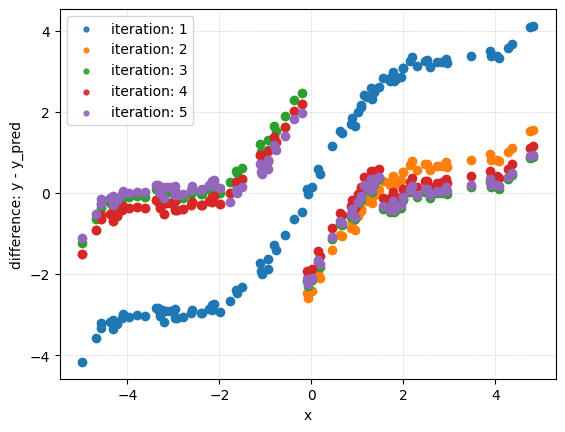

In [41]:
gbt = GBTRegressor()
gbt.fit(X, y)

for (i, residual) in enumerate(gbt.residuals[:5]):
  plt.plot(X, residual, 'o')
  plt.scatter(X, residual, s=12, alpha=0.9, label=f'iteration: {i + 1}')

plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.xlabel('x')
plt.ylabel('difference: y - y_pred')
plt.legend()
plt.show()


*Odpowiedzi:*
- model początkowy $F_0(x)$
$$F_0(x) = \arg \min_v \sum_{i=1}^N L(y_i, v) = \frac{1}{2} \sum_{i=1}^N (y_i- v)^2 $$
wartość ta to oczywiście średnia arytmetyczna $v = \frac{1}{n} \sum_{i=1}^N y_i$. (Upewnij się, że to rozumiesz poprzez policzenie pochodnej i przyrównanie jej do 0).
- wzór na wartość ujemnego gradientu tj. pseudo-rezyduum 
$$r_i  =  - \frac{\partial}{\partial \hat{y_i}} L(y_i, \hat{y_i}) = - \frac{\partial}{\partial \hat{y_i}} \frac{1}{2}(y_i- \hat{y_i})^2$$
Co po przekształceniach wykorzystujących regułę łańcuchową ("pochodna zewnętrzna razy pochodna wewnętrzna"):
$$r_i  = -\frac{1}{2} 2(y_i- \hat{y_i})\frac{\partial}{\partial \hat{y_i}} (y_i- \hat{y_i}) 
= -(y_i- \hat{y_i})\cdot(-1)
= y_i- \hat{y_i}  $$
- wzór na wartość liścia $v$ optymalizujący funkcję celu
$$v = \arg \min_v \sum_{i=1}^{N_l} L(y_i, F_{m-1}(x_i) + v) = \frac{1}{2} \sum_{i=1}^{N_l} (y_i- F_{m-1}(x_i) - v)^2 $$
Co można dalej obliczyć poprzez przyrównanie pochodnej do 0 lub poprzez zauważenie że jest to w naszej sytuacji ten sam wzór co dla modelu początkowego gdzie $y_i$ zostało zastępione $y_i- F_{m-1}(x_i)=r_i$. W związku z tym wartość liścia to $v = \frac{1}{n} \sum_{i=1}^N r_i$

## Zadanie 2
Zaimplementuj GBT dla problemu klasyfikacji binarnej, który będzie optymalizował błąd regresji logicznej tj. entropię krzyżową wyrażoną wzorem:
$$L(y_i, \hat{p_i}) = y_i \log \hat{p_i} +  (1-y_i) \log (1-\hat{p_i}) $$
gdzie $y_i\in \{0,1\}$ to prawdziwa wartość klasy a $\hat{p_i}$ to predykcja klasyfikatora dla $i$-tego elementu.

- Zauważ, że GBT wykorzystuje drzewa regresji, które - choć modyfikujemy im sposób obliczania liści - nadal tworzą podziały dla miary SSE. Aby wykorzystać GBT do problemu klasyfikacji, należy zastanowić się jak możemy wykorzystać regresor do klasyfikacji. Ten problem rozwiązywaliśmy już wcześniej przy omawianiu regresji logistycznej, gdzie tworzyliśmy klasyfikator z modelu regresji liniowej. Przypomnijmy, że w regresji logistycznej model regresji liniowej służy do predykcji logitu prawdopodobieństwa klasy (który przypomnijmy ma zakres wartości od $-\infty$ do $\infty$)
$$\text{logit}(p_x) = \ln \frac{p_x}{1-p_x}=w^Tx+b$$
Podobnie w GBT należy skonstruować model regresji do przewidywania wartości $\text{logit}(p_x)$, a jedynie przy predykcji (lub kiedy jest to wygodne) transformować go do prawdopodobieństwa klasy funkcją sigmoidalną $p_x  = \frac{1}{1+e^{- \text{logit}(p_x)}}  $

**Zadania**

1. Powyższy zapis funkcji celu $L(y_i, \hat{p_i})$ jest wyrażony w zależności od prawdopodobieństwa klasy, a nie wartości logitu $L(y_i, \text{logit}(\hat{p_i}))$. Przekształć wzór na funkcję celu, aby jej argumentem był logit. Zwróć uwagę, że model regresji będzie przewidywał właśnie logit, więc przy wyznaczaniu elementów algorytmu GBT należy liczyć np. pochodne tej właśnie przekształconej funkcji.

    Zapisz wzór na tę funkcję w komórce poniżej (np. w komentarzu, nie musisz implementować).


$\hat{y}_i=logit(\hat{p}_i),\;

\hat{p}_i=\frac{e^{\hat{y}_i}}{1+e^{\hat{y}_i}}\\

L(y_i,\hat{y}_i)=-y_i\cdot\hat{y}_i+log\left(1+e^{\hat{y}_i}\right)$

2. Zacznijmy uzupełniać w ogólnym pseudokodzie przedstawionym na zajęciach brakujące elementy. Wyznacz model początkowy $F_0(x)$ zwracający stałą wartość $v$ która optymalizuje błąd:
$$F_0(x) = \arg \min_v \sum_{i=1}^N L(y_i, v) $$


$
\overline{y} = \frac{1}{N}\sum_{i=1}^N y_i\\
\sum\limits_{i=1}^{n}L(y_i,v)=\sum\limits_{i=1}^n\left(-y_i+\frac{e^v}{1+e^v}\right)=-\overline{y}+n\frac{e^v}{1+e^v}=0\\
F_0(x) = v = \ln\left(\frac{\overline{y}}{1-\overline{y}}\right),y\in(0,1)
$

3. Wyznacz wzór na wartość ujemnego gradientu tj. pseudo-rezyduum:
$$r_i  =  - \frac{\partial}{\partial \hat{y_i}} L(y_i, \hat{y_i}) $$
Uwaga: na samym końcu, aby wzór uzykał prostszą formę, możesz zamienić w nim wartości logitów z powrotem na prawdopodobieństwa.

$$r_i=-\frac{\partial}{\partial}L(y,\hat{y}_i)=-\left(-y_i+\frac{\hat{y}_i}{1+e^{\hat{y}_i}}\right)=y_i-\hat{p}_i$$

4. Wzór na wartość liścia $v$ optymalizujący funkcję celu całego modelu GBT
$$v = \arg \min_v \sum_{i=1}^{N_l} L(y_i, F_{m-1}(x_i) + v) $$
niestety nie jest prosty do wyznaczenia w tym przypadku. Stosuje się przybliżenie Taylora drugiego rzedu tej funkcji i wtedy optimum ma postać:
$$v = \frac{-\sum_{i=1}^{N_L} L_i' }{\sum_{i=1}^{N_L} L_i''}$$
gdzie $L_i'$ i $L_i''$ to skrócony zapis pierwszej i drugiej pochodnej policzonej po funkcji straty dla $i$-tego elementu. Ponieważ $r_i=-L_i'$ to licznik przyjmuje postać $\sum_{i=1}^{N_L} r_i $. Wyznacz cały wzór.



$$Y_i=F_{m-1}\left(x_i\right)+v$$
$$v=-\sum\limits_{i=1}^{N_L}\frac{\frac{\partial}{\partial_v}\left(y_i,Y_i\right)}{\frac{\partial^2}{\partial^2_v}L\left(y_i,Y_i\right)}$$
$$e^{Y_i+v}=\frac{\hat{p}_i}{1-\hat{p}_i}$$
$$v=\sum\limits_{i=1}^{N_L}\frac{y_i-\hat{p}_i}{\hat{p}_i\left(1-\hat{p}_i\right)}$$
$$v=\sum\limits_{i=1}^{N_L}\frac{r_i}{\hat{p}_i\left(1-\hat{p}_i\right)}$$


Wykorzystując uzyskane wyniki zaimplementuj algorytm.

In [7]:
import scipy.special


# Wskazówka: scipy.special.expit() implemenuje funkcję sigmoidalną

class GBTClassifier(object):
  def __init__(self):
    self.trees = []
    self.initial_model = None

  def calc_leaf(self, X, y, last_predicted):
    return np.sum(y) / np.sum(last_predicted * (1 - last_predicted))

  def fit(self, X, y, M=100, max_depth=1):
    self.initial_model = np.log(np.mean(y) / (1 - np.mean(y)))
    last_predicted = np.full(X.shape[0], self.initial_model)

    for _ in range(M):
      r = y - last_predicted
      tree = Node(calculate_leaf_value=self.calc_leaf)
      tree.fit(X, r, last_predicted, max_depth=max_depth)
      last_predicted += tree.predict(X)
      self.trees.append(tree)

  def predict(self, X):
    predicted = np.array([tree.predict(X) for tree in self.trees]).sum(0)
    return scipy.special.expit(self.initial_model + predicted)


Przetestuj swoją implementację na zbinaryzowanym zbiorze `iris`.

/home/teba_dzdancewicz/PycharmProjects/2023-sus/venv/lib64/python3.11/site-packages/numpy/core/fromnumeric.py:3747: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/teba_dzdancewicz/PycharmProjects/2023-sus/venv/lib64/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/teba_dzdancewicz/PycharmProjects/2023-sus/venv/lib64/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


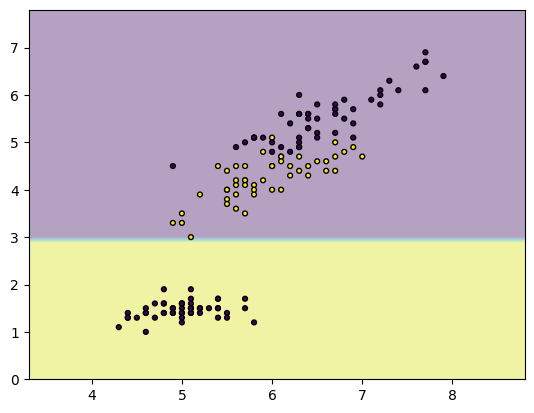

In [45]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target
y[y==2] = 0 # Sprowadzenie problemu do klasyfikacji binarnej

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

clf = GBTClassifier()
clf.fit(X,y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=12, edgecolor='k')
plt.show()

Narysuj granice decyzji klasyfikatora dla 10, 20, 50 i 100 iteracji algorytmu dla klasyfikatora bazowego o maksymalnej głębokości 1 i 2.

/home/teba_dzdancewicz/PycharmProjects/2023-sus/venv/lib64/python3.11/site-packages/numpy/core/fromnumeric.py:3747: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/teba_dzdancewicz/PycharmProjects/2023-sus/venv/lib64/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/teba_dzdancewicz/PycharmProjects/2023-sus/venv/lib64/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


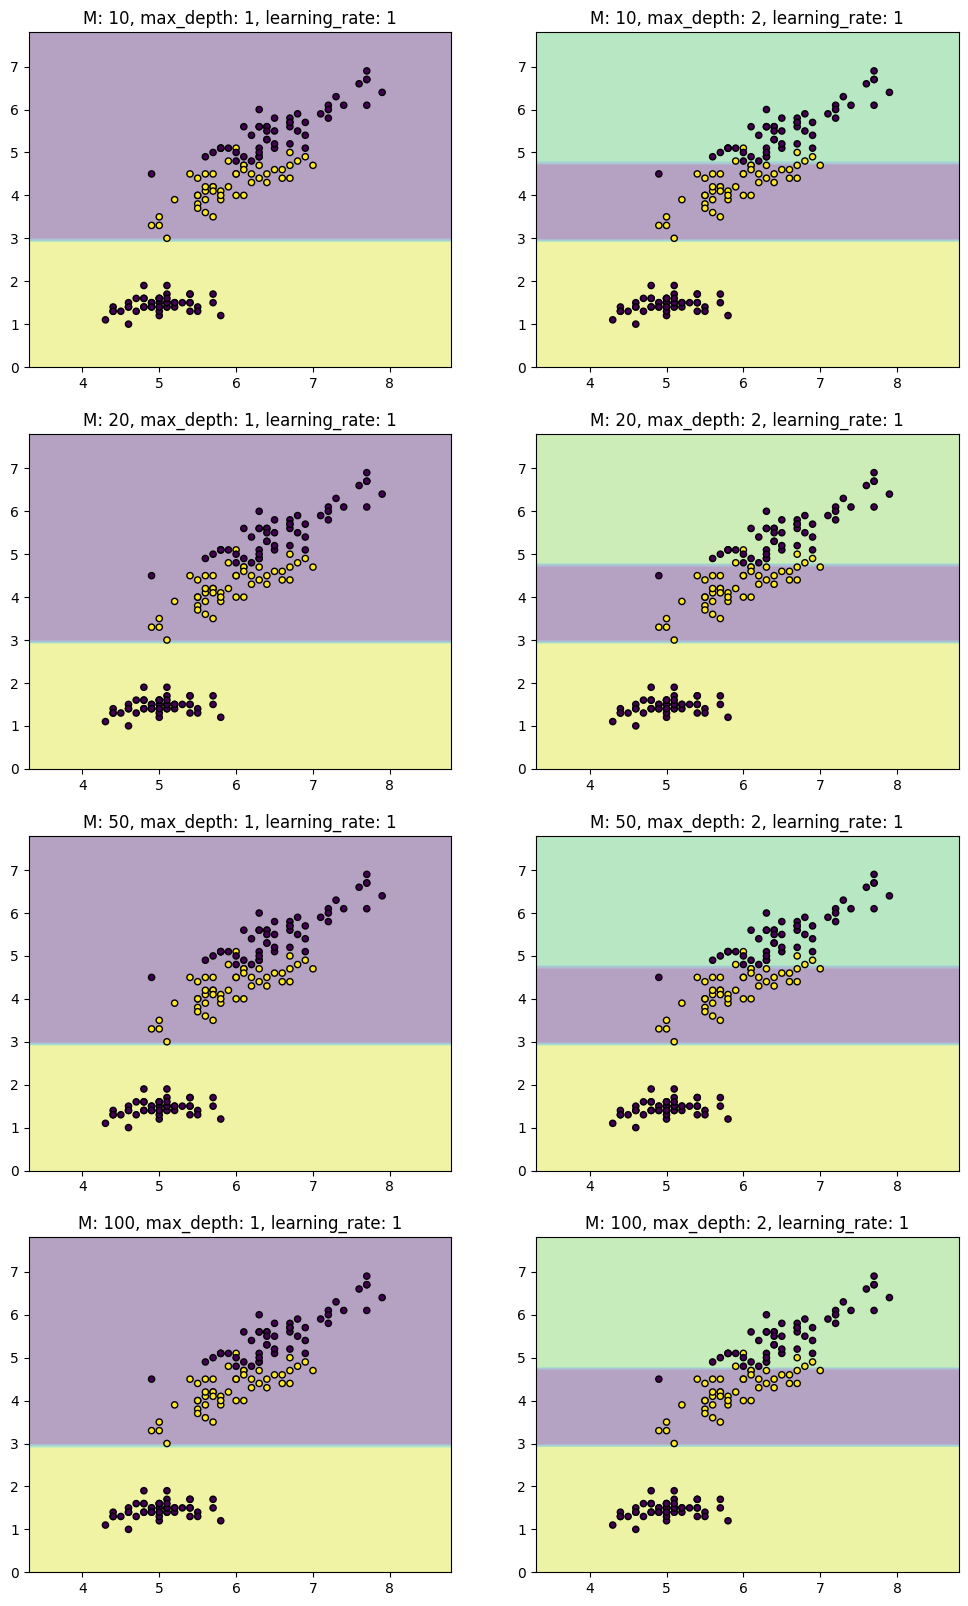

In [46]:
def plot_boundaries(ax, X, y, M=100, max_depth=1, learning_rate=1) -> None:
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))

    clf = GBTClassifier(learning_rate=learning_rate)
    clf.fit(X, y, M=M, max_depth=max_depth)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    ax.set_title(f'M: {M}, max_depth: {max_depth}, learning_rate: {learning_rate}')


Ms, depths = (10, 20, 50, 100), (1, 2)
_, axes = plt.subplots(nrows=len(Ms), ncols=len(depths), figsize=(12, 20))

for i, classifiers in enumerate(Ms):
    for j, depth in enumerate(depths):
        plot_boundaries(axes[i][j], X, y, M=classifiers, max_depth=depth)


**Ćwiczenia**
1. Przeanalizuj wyniki powyższego eksperymentu i określ w których sytuacjach nastąpiło przeuczenie.
2. W jaki sposób zaimplementować GBT dla problemu klasyfikacji wieloklasowej?
3. W powyższym problemie który z klasyfikatorów bazowych (o jakiej max. głębokości) poradził sobie lepiej? Czy jest sens stosować w tym problemie drzewa o głębokości większej niż testowana (tj. 2). Odpowiedź uzasadnij.
4. Dodaj do implementacji parametr $\eta$ i przetestuj kilka jego wartości. Pamętaj, że $\eta$ powinno być wykorzystywane nie tylko w funkcji `fit`, ale także `predict` - dlaczego?

Odpowiedź na trzecią kropkę umieść poniżej.

YOUR ANSWER HERE

## Zadanie 3
GBT jest bardzo popularnym algorytmem głównie dzięki bardzo efektywnym implementacjom potrafiącym sobie radzić z dużymi zbiorami danych. W tym ćwiczeniu Twoim zadaniem jest nauczenie się podstaw obsługi biblioteki `catboost`, którą powinieneś zainstalować.

Wczytanie zbioru danych `iris` z poprzedniego zadania.

In [10]:
from catboost import CatBoostClassifier
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target
# Binaryzacja problemu
y[y == 2] = 0

Trening modelu

In [11]:
model = CatBoostClassifier(logging_level='Silent')
model.fit(X, y, eval_set=(X, y), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Przykładowy kod ewaluuje działanie algorytmu na części uczącej. Podziel zbiór na część uczącą i testową i ponownie uruchom algorytm. 


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = CatBoostClassifier()
model.fit(X_train, y_train, eval_set=(X_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.01877
0:	learn: 0.6790093	test: 0.6802728	best: 0.6802728 (0)	total: 677us	remaining: 677ms
1:	learn: 0.6537920	test: 0.6573516	best: 0.6573516 (1)	total: 1.16ms	remaining: 579ms
2:	learn: 0.6270046	test: 0.6345275	best: 0.6345275 (2)	total: 1.57ms	remaining: 521ms
3:	learn: 0.6018359	test: 0.6117639	best: 0.6117639 (3)	total: 1.99ms	remaining: 497ms
4:	learn: 0.5797031	test: 0.5872079	best: 0.5872079 (4)	total: 2.43ms	remaining: 484ms
5:	learn: 0.5552197	test: 0.5668421	best: 0.5668421 (5)	total: 2.94ms	remaining: 487ms
6:	learn: 0.5343299	test: 0.5470363	best: 0.5470363 (6)	total: 3.45ms	remaining: 490ms
7:	learn: 0.5156345	test: 0.5333123	best: 0.5333123 (7)	total: 12.9ms	remaining: 1.6s
8:	learn: 0.4942195	test: 0.5159385	best: 0.5159385 (8)	total: 17.1ms	remaining: 1.88s
9:	learn: 0.4741470	test: 0.4986234	best: 0.4986234 (9)	total: 17.7ms	remaining: 1.75s
10:	learn: 0.4565917	test: 0.4837664	best: 0.4837664 (10)	total: 19.7ms	remaining: 1.77s
11:	learn: 0.4

Gdybyś porównał wartość funkcji straty osiągniętej przez catboost z wartością uzyskaną Twoją implementacją na zbiorze uczącym przy analogicznej liczbie drzew (domyślnie w `GBTClassifier` $M=100$) to wartość ta będzie najprawdopodobniej niższa dla... Twojej implementacji. Dlaczego? Czy to oznacza, że - pomijając aspekt wydajności obliczeń - Twoja metoda działa lepiej niż catboost?

*Dla chętnych*: porównaj wartość funkcji straty osiągniętej przez catboost z Twoją implementacją z zadania 2.

YOUR ANSWER HERE

Zaimportuj dowolny większy i bardziej wymagający zbiór danych. Ćwiczenie możesz wykonać na [dowolnym zbiorze danych](https://catboost.ai/docs/concepts/python-reference_datasets.html) - ładowanie zbioru może trochę potrwać. Jeśli masz problemy sprzętowe z operowaniem na dużym zbiorze danych to jest też dostępny zbiór `titanic`.

In [13]:
from catboost import datasets

ds_train, ds_test = datasets.adult()
ds_train.dropna()
ds_test.dropna()

X_train = ds_train.drop(columns=['income'])
X_test = ds_test.drop(columns=['income'])
y_train = ds_train['income']
y_test = ds_test['income']

X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba


Spróbuj osiągnąć jak najlepszy wynik na wybranym zbiorze poprzez tuning parametrów. Ważne parametry uczenia zostały opisane [tutaj](https://catboost.ai/docs/concepts/python-reference_parameters-list.html).

In [14]:
categories = [
  'workclass',
  'education',
  'marital-status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'native-country'
]
X_train[categories] = X_train[categories].fillna(value='na')
X_test[categories] = X_test[categories].fillna(value='na')
model = CatBoostClassifier(cat_features=categories)
grid = {
  "learning_rate":[0.01, 0.02, 0.05, 0.1],
  "depth":[1,2,3, 4, 6, 8, 10],
  "l2_leaf_reg":[1, 3, 5, 7, 9, 10]
}
result = model.randomized_search(grid, X_train, y_train, plot=True)
print(f"best parameters: {result['params']=}")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6808908	test: 0.6806591	best: 0.6806591 (0)	total: 60.1ms	remaining: 1m
1:	learn: 0.6692441	test: 0.6687863	best: 0.6687863 (1)	total: 129ms	remaining: 1m 4s
2:	learn: 0.6581800	test: 0.6574601	best: 0.6574601 (2)	total: 179ms	remaining: 59.6s
3:	learn: 0.6476539	test: 0.6467148	best: 0.6467148 (3)	total: 215ms	remaining: 53.5s
4:	learn: 0.6377205	test: 0.6365792	best: 0.6365792 (4)	total: 259ms	remaining: 51.5s
5:	learn: 0.6282242	test: 0.6268885	best: 0.6268885 (5)	total: 283ms	remaining: 46.9s
6:	learn: 0.6192013	test: 0.6176535	best: 0.6176535 (6)	total: 312ms	remaining: 44.3s
7:	learn: 0.6107394	test: 0.6090014	best: 0.6090014 (7)	total: 341ms	remaining: 42.3s
8:	learn: 0.6026974	test: 0.6007864	best: 0.6007864 (8)	total: 356ms	remaining: 39.2s
9:	learn: 0.5968513	test: 0.5948672	best: 0.5948672 (9)	total: 367ms	remaining: 36.3s
10:	learn: 0.5911420	test: 0.5890373	best: 0.5890373 (10)	total: 395ms	remaining: 35.5s
11:	learn: 0.5838212	test: 0.5815439	best: 0.5815439 (

Jakie ustawienia parametrów dały najlepszy wynik na wybranym zbiorze danych? Które z parametrów algorytmu miały najsilniejszy wpływ na ostateczny wynik?

Depth: 4, learning_rate: 0.1, l2_leaf_reg: 10

**Uwaga** Przed wysłaniem zadania domowego wróć do komórki w której ładowałeś zbiór danych i zakomentuj ją, aby niewykonała się ona na sprawdzarce.